In [22]:
#1 Задание

In [98]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy. stats import norm
import math
import seaborn as sns

In [99]:
number_of_trials=1000

In [100]:
# Решка значение 0, Орел значениe 1

In [101]:
massiv=random.choices([0,1],weights=[1,1],k=number_of_trials) #наши исходы массив из 1 и 0

In [102]:
# Теперь нарисуем среднее значение всех исходов относительно количество бросков монеты\


In [103]:
massiv_sred = []
for i in range(len(massiv)):
    counter = 0
    for j in range(i):
        counter+=massiv[j]
    if i == 0:
        massiv_sred.append(counter)
        continue
    massiv_sred.append(counter/i)


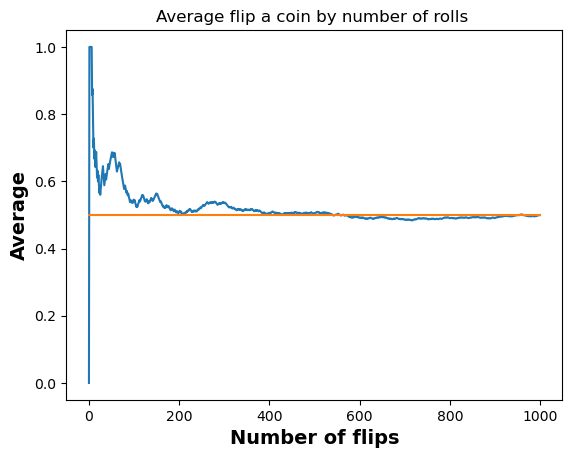

In [104]:
plt.plot(massiv_sred)
plt.plot([1/2]*number_of_trials)
plt.title("Average flip a coin by number of rolls ")
plt.xlabel("Number of flips", fontsize=14, fontweight="bold")
plt.ylabel("Average", fontsize=14, fontweight="bold")
plt.show()

In [105]:
#Игральный кубик шестигранный  вероятность у каждого события 1/6

In [106]:
massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=number_of_trials)

In [107]:
massiv_sred_1 = []
for i in range(len(massiv1)):
    counter = 0
    for j in range(i):
        counter+=massiv1[j]
    if i == 0:
        massiv_sred_1.append(counter)
        continue
    massiv_sred_1.append(counter/i)

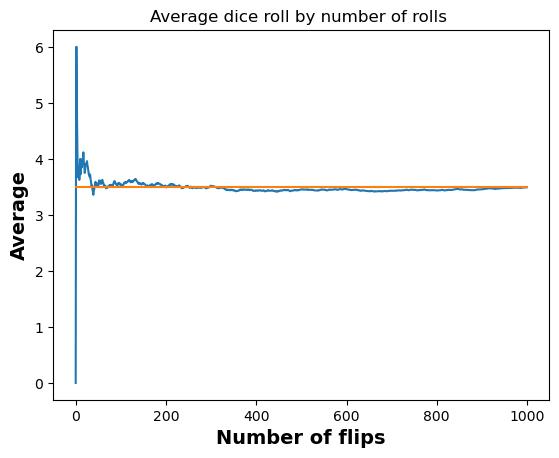

In [108]:
plt.plot(massiv_sred_1)
plt.plot([3.5]*number_of_trials)
plt.title("Average dice roll by number of rolls ")
plt.xlabel("Number of flips", fontsize=14, fontweight="bold")
plt.ylabel("Average", fontsize=14, fontweight="bold")
plt.show()

In [109]:
#Доп задание


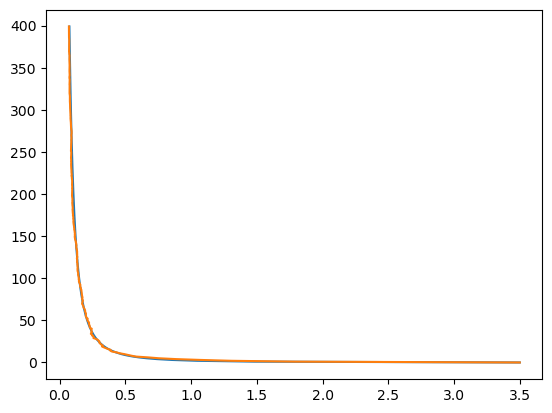

Коэффицент С/sqrt(n),примерно 1.48


In [110]:
X = []
for i in range(100):
    massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=400)
    X.append(massiv1)

Y = []
for l in range(100):
    for k in range(400):
        counter = 0
        for j in range(k):
            counter +=X[l][j]
        Y.append(abs(counter/(k+1) - 3.5))
C = []
B = np.reshape(Y, (100, 400))
for k in range(400):
    counter = 0
    for i in range(100):
        counter+=B[i][k]
    C.append(counter/100)
def f(n):
    return 3.5 if n == 0 else 1.48/math.sqrt(n)
q = []
q1 = []
for i in range(0,400):
    q.append(f(i)) 
    q1.append(i)
plt.plot(q,q1)
plt.plot(C,q1)
plt.show()
print("Коэффицент С/sqrt(n),примерно 1.48")

In [111]:
# 2 Задание

In [112]:
number_of_trials=200

In [113]:
massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=number_of_trials)

In [114]:
E_e1 = 7/2
D_e1 = 35/12

In [115]:
CPT = []
for i in range(10,1000,10):
    massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=10000)
    counter = sum(massiv1)
    CPT.append( (counter-(10000)*E_e1) / math.sqrt((10000)*D_e1) )

In [116]:
#Cоставим из значений CPT гистограмму
from scipy.stats import kstest

In [117]:
a = []
for i in [100,1000,10000,100000]:
    CPT = []
    for j in range(10,i,10):
        massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=10000)
        counter = sum(massiv1)
        CPT.append( (counter-(10000)*E_e1) / math.sqrt((10000)*D_e1) )
    a.append(kstest(CPT,'norm')[0])
print(a)

[0.24936763216838476, 0.04801298692394795, 0.03227733638603281, 0.01019501138159562]


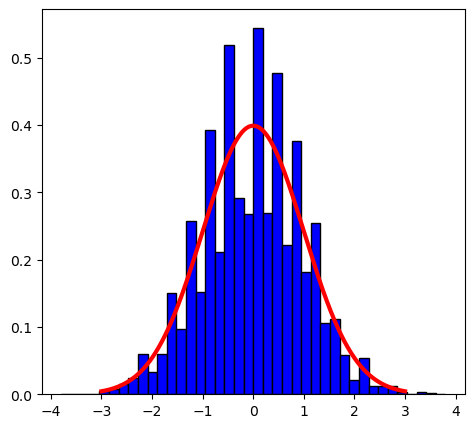

In [118]:
CPT = []
for i in range(10,100000,20):
    massiv1=random.choices([1,2,3,4,5,6],weights=[1/6,1/6,1/6,1/6,1/6,1/6],k=20)
    counter = sum(massiv1)
    CPT.append( (counter-(20)*E_e1) / math.sqrt((20)*D_e1) )
    
fig = plt.figure(figsize=(12, 5))
OX = fig.add_subplot(1, 2, 1)
OX.hist(CPT, color = 'blue', edgecolor = 'black', density=True,
         bins = int(40))
x = np.arange (-3, 3, 0.001)
OX.plot(x, norm.pdf(x, 0, 1), color='red', linewidth= 3)

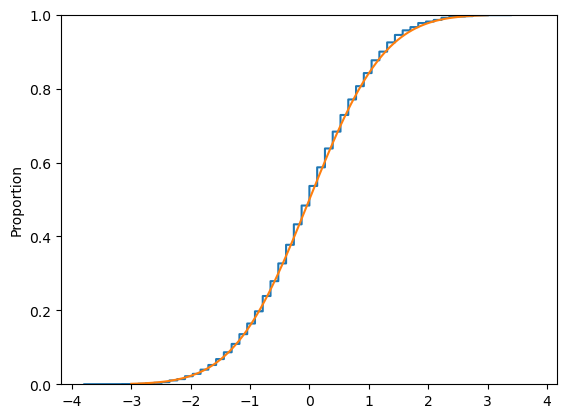

In [119]:

ax2 = sns.ecdfplot(CPT)
x = np.linspace(-3,3,100)
norm_rv = norm(0, 1)
cdf = norm_rv.cdf(x)
ax2.plot(x, cdf)
plt.show()
# желтая функция равномерного, а синяя это эмперическая функция исходного распределения

In [120]:
#3 Задание

In [131]:
from scipy.stats import poisson
from scipy.stats import uniform

In [132]:
T = 1
lambda_f = lambda t : (1-t)**2

In [133]:
#N(T) ~ П (integral(lambda(t)dt))

In [134]:
F_reverse = lambda y: 1 - (1-y)**(1/3) # y = F(t) выразили t

In [135]:
def gen_sample():
    N = poisson.rvs(mu = 1/3,size=1).item()
    a = uniform.rvs(size=N) # генерим однородные непрерывные случ велечины
    return np.array(sorted(F_reverse(a)))
    

In [136]:
gen_sample()

array([], dtype=float64)

[0.22358238]


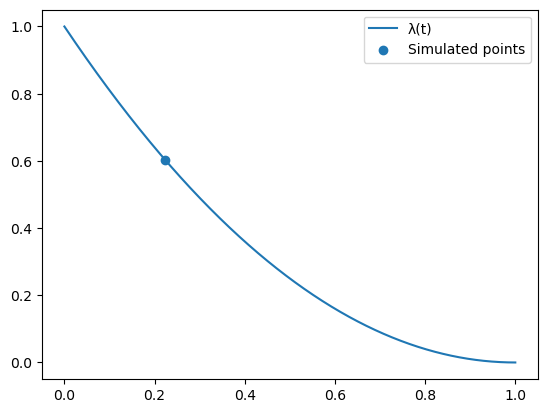

In [137]:
sample = gen_sample()
print(sample)
plt.plot(np.linspace(0, T, 1000), lambda_f(np.linspace(0, T, 1000)),label=f"λ(t)")
plt.scatter(sample, lambda_f(sample), label="Simulated points")
plt.legend()

In [138]:
def gen_n_samples(n):
    a = []
    for i in range(n):
        a.extend(gen_sample())
    return np.array(sorted(a))

In [139]:
def approximate(a,n):    
    intervals,heights = [],[]
 
    dt = 0.3
    if len(a)>100:
        dt = 0.01
    b = np.arange(0,T,dt)
    for i in b:
        intervals.append(i)
        counter = 0
        for p in a:
            if i < p <= i+dt: 
                counter +=1 
        heights.append(counter/(n*dt))    
    C = 0
    error = float('inf')
    for c in range(0,1000,1):
        q = [c*(lambda_f(t)) for t in intervals]
        new_error = np.sum(np.abs(heights - np.array(q)))
        if new_error < error:
            error = new_error
            C = c
    
    
    X = np.linspace(0, T, 1000)
    plt.step(intervals, heights, label=f"Эмпирическая оценка {n} симуляций")
    plt.plot(X, C * lambda_f(X), color='y', label=f"C * λ(t)где C={C}")
    plt.legend()
    plt.show()

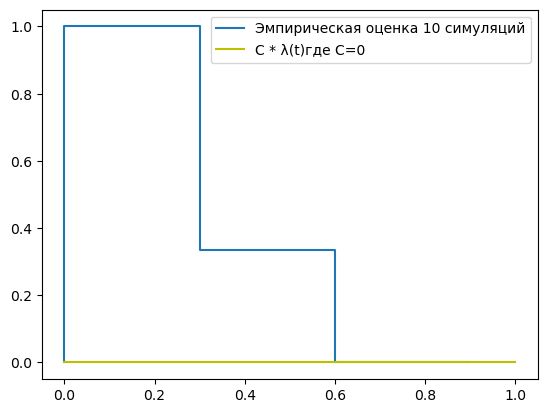

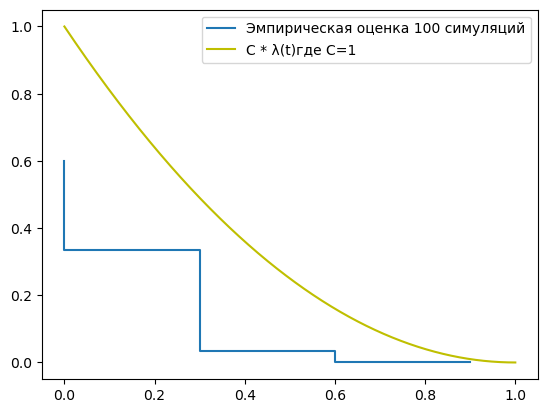

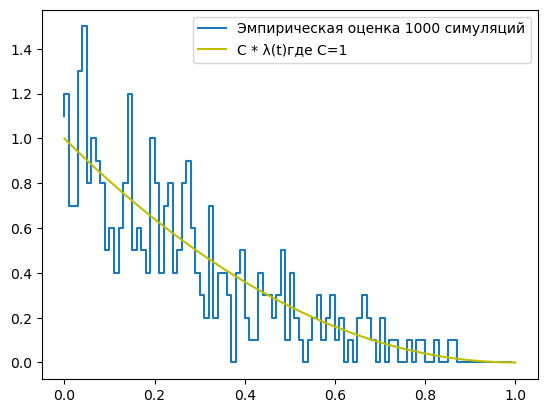

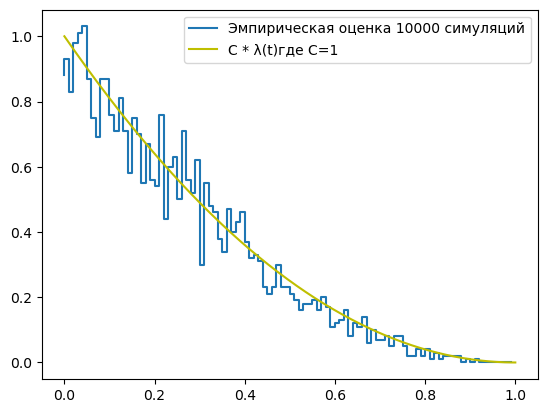

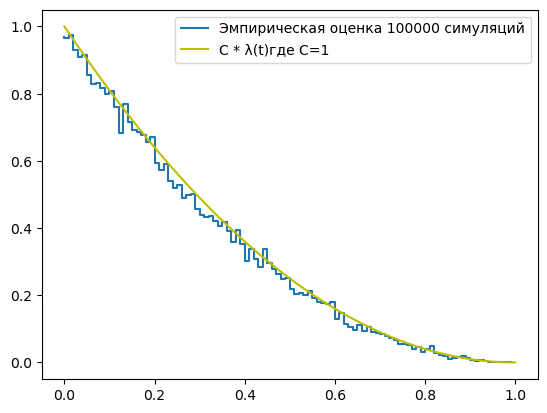

In [140]:
for n in [10, 100,1000,10000,100000]:
    samples = gen_n_samples(n) # n Симмуляций процесса Пуассона 
    approximate(samples, n)